Models in folder:
['xgboost.pkl', 'logistic.pkl', 'catboost.pkl', 'lightgbm.pkl', 'random_forest.pkl']

CATBOOST
  Accuracy: 65.0%
  Macro F1:  0.313
  Buy Prec:  16.7%
  Buy Rec:   12.5%


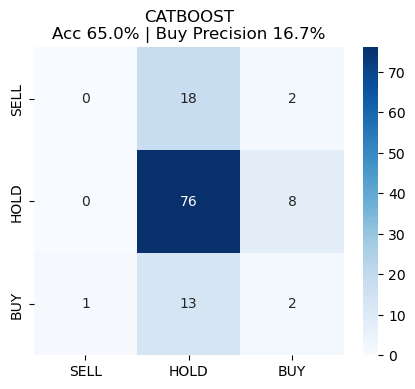


LIGHTGBM
  Accuracy: 68.3%
  Macro F1:  0.353
  Buy Prec:  37.5%
  Buy Rec:   18.8%


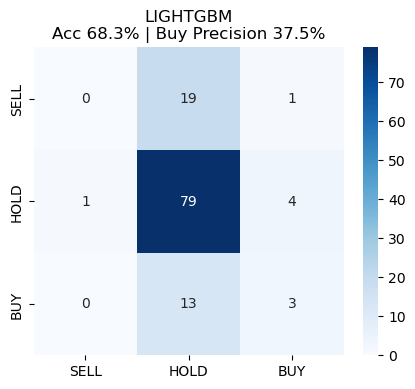


XGBOOST
  Accuracy: 67.5%
  Macro F1:  0.269
  Buy Prec:  0.0%
  Buy Rec:   0.0%


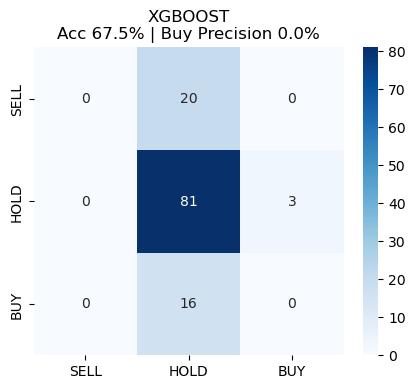


RANDOM_FOREST
  Accuracy: 70.0%
  Macro F1:  0.275
  Buy Prec:  0.0%
  Buy Rec:   0.0%


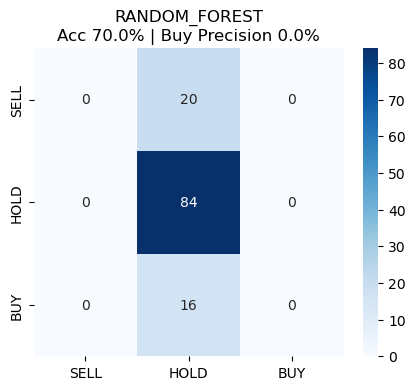


LOGISTIC
  Accuracy: 35.0%
  Macro F1:  0.313
  Buy Prec:  18.4%
  Buy Rec:   43.8%


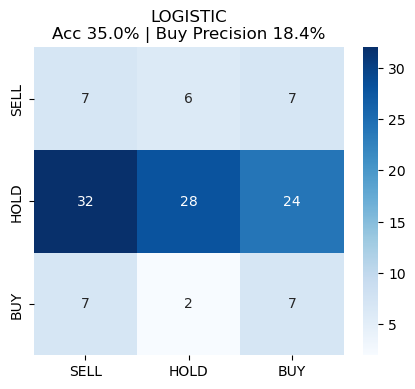

In [11]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Verify models exist
print("Models in folder:")
print(os.listdir("../models"))

df = pd.read_csv("../data/processed/btcusdt_final.csv")
df["future_return"] = df["close"].pct_change().shift(-1)
df["label"] = df["future_return"].apply(lambda x: 2 if x > 0.02 else (0 if x < -0.02 else 1))
df = df.dropna().reset_index(drop=True)

FEATURES = ['prev_close','prev_volume','rsi','macd','sma_20','sma_50','sma_200',
            'bb_upper','bb_lower','stoch_k','daily_return','volatility_30d']

X_test = df[FEATURES].iloc[int(len(df)*0.85):]
y_test = df["label"].iloc[int(len(df)*0.85):]

for name in ["catboost", "lightgbm", "xgboost", "random_forest", "logistic"]:
    path = f"../models/{name}.pkl"
    model = joblib.load(path)
    pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    cm = confusion_matrix(y_test, pred)
    buy_prec = cm[2,2] / (cm[:,2].sum() or 1)
    buy_rec = cm[2,2] / (cm[2,:].sum() or 1)
    
    print(f"\n{name.upper()}")
    print(f"  Accuracy: {acc:.1%}")
    print(f"  Macro F1:  {f1:.3f}")
    print(f"  Buy Prec:  {buy_prec:.1%}")
    print(f"  Buy Rec:   {buy_rec:.1%}")
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['SELL','HOLD','BUY'],
                yticklabels=['SELL','HOLD','BUY'])
    plt.title(f"{name.upper()}\nAcc {acc:.1%} | Buy Precision {buy_prec:.1%}")
    plt.show()